World Bank Projects & Operations provides access to basic information on all of the World Bank's lending projects from 1947 to the present. The dataset includes basic information such as the project title, task manager, country, project id, sector, themes, commitment amount, product line, and financing. It also provides links to publicly disclosed online documents.

Using the status variable build a binary classifier to predict the probability
whether a project will be “closed” or “canceled/distressed

In [78]:
#convert xls to csv 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
read_file = pd.read_excel ("world_bank_data.xls")
  
# Write the dataframe object
# into csv file
read_file.to_csv ("bank_data.csv", 
                  index = None,
                  header=True)
    
# read csv file and convert 
# into a dataframe object
df = pd.DataFrame(pd.read_csv("bank_data.csv"))
  
# show the dataframe
df

,"World Bank Projects, data as of 06/13/2022 22:00:02 EST",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26
0,Project ID,Region,Country,Project Status,Last Stage Reached Name,Project Name,Project Development Objective,Implementing Agency,Consultant Services Required,Project URL,...,Grant Amount,Borrower,Lending Instrument,Environmental Assessment Category,Environmental and Social Risk,Sector 1,Sector 2,Sector 3,Theme 1,Theme 2
1,id,regionname,countryname,projectstatusdisplay,last_stage_reached_name,project_name,pdo,impagency,cons_serv_reqd_ind,url,...,grantamt,borrower,lendinginstr,envassesmentcategorycode,esrc_ovrl_risk_rate,sector1,sector2,sector3,theme1,theme2
2,P252350,Eastern and Southern Africa,Republic of Rwanda,Active,Bank Approved,Rwanda Priority Skills for Growth (PSG),The Program Development Objective is to expand...,Ministry Of Education,NaN,http://projects.worldbank.org/P252350/null?lan...,...,0,Ministry of Finance and Economic Planning,Program-for-Results Financing,NaN,NaN,Public Administration - Education,Tertiary Education,Workforce Development and Vocational Education,Education for the knowledge economy,NaN
3,P252338,East Asia and Pacific,Democratic Republic of Timor-Leste,Active,Bank Approved,Road Climate Resilience Project Second Additio...,The project will deliver sustainable climate r...,"Ministry of Public Works, Transport, and Commu...",NaN,http://projects.worldbank.org/P252338/null?lan...,...,0,Ministry of Finance,Investment Project Financing,B,NaN,Public Administration - Transportation,Rural and Inter-Urban Roads,NaN,NaN,NaN
4,P252337,Eastern and Southern Africa,Republic of Kenya,Dropped,Concept Review,Kenya Devolution and Service Delivery,To improve citizen and government access to co...,Kenya National Bureau of Statistics,NaN,http://projects.worldbank.org/P252337/null?lan...,...,340000,Kenya National Bureau of Statistics,Investment Project Financing,C,NaN,NaN,NaN,NaN,"Public expenditure, financial management and p...",Decentralization
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21540,P000019,Africa,Africa,Dropped,NaN,UEMOA Regional Financial Sector Project,NaN,NaN,NaN,http://projects.worldbank.org/P000019/null?lan...,...,0,NaN,Specific Investment Loan,C,NaN,NaN,NaN,NaN,NaN,NaN
21541,P000017,Africa,Africa,Closed,Bank Approved,Engineering and Technical Assistance Project,NaN,NaN,NaN,http://projects.worldbank.org/P000017/engineer...,...,0,NaN,Technical Assistance Loan,C,NaN,Power,NaN,NaN,Legal institutions for a market economy,Regional integration
21542,P000010,Africa,Africa,Closed,NaN,Regional Development Project (03),NaN,NaN,NaN,http://projects.worldbank.org/P000010/null?lan...,...,0,NaN,Financial Intermediary Loan,B,NaN,Banking Institutions,"Other Agriculture, Fishing and Forestry",Other Transportation,Environmental policies and institutions,Other financial and private sector development
21543,P000003,Africa,Africa,Closed,Bank Approved,REIMP(CEN.ENV.INFO),NaN,NaN,NaN,http://projects.worldbank.org/P000003/reimpcen...,...,4100000,NaN,Specific Investment Loan,C,NaN,Other Public Administration,Other Information and Communications Technologies,Social Protection,Land administration and management,Environmental policies and institutions


Finding Null values and dropping unecessary columns 

In [79]:
#take 1st row in a list 
df.iloc[0] = df.iloc[0].tolist()
df.columns = df.iloc[0]


In [80]:
df 

,Project ID,Region,Country,Project Status,Last Stage Reached Name,Project Name,Project Development Objective,Implementing Agency,Consultant Services Required,Project URL,...,Grant Amount,Borrower,Lending Instrument,Environmental Assessment Category,Environmental and Social Risk,Sector 1,Sector 2,Sector 3,Theme 1,Theme 2
0,Project ID,Region,Country,Project Status,Last Stage Reached Name,Project Name,Project Development Objective,Implementing Agency,Consultant Services Required,Project URL,...,Grant Amount,Borrower,Lending Instrument,Environmental Assessment Category,Environmental and Social Risk,Sector 1,Sector 2,Sector 3,Theme 1,Theme 2
1,id,regionname,countryname,projectstatusdisplay,last_stage_reached_name,project_name,pdo,impagency,cons_serv_reqd_ind,url,...,grantamt,borrower,lendinginstr,envassesmentcategorycode,esrc_ovrl_risk_rate,sector1,sector2,sector3,theme1,theme2
2,P252350,Eastern and Southern Africa,Republic of Rwanda,Active,Bank Approved,Rwanda Priority Skills for Growth (PSG),The Program Development Objective is to expand...,Ministry Of Education,NaN,http://projects.worldbank.org/P252350/null?lan...,...,0,Ministry of Finance and Economic Planning,Program-for-Results Financing,NaN,NaN,Public Administration - Education,Tertiary Education,Workforce Development and Vocational Education,Education for the knowledge economy,NaN
3,P252338,East Asia and Pacific,Democratic Republic of Timor-Leste,Active,Bank Approved,Road Climate Resilience Project Second Additio...,The project will deliver sustainable climate r...,"Ministry of Public Works, Transport, and Commu...",NaN,http://projects.worldbank.org/P252338/null?lan...,...,0,Ministry of Finance,Investment Project Financing,B,NaN,Public Administration - Transportation,Rural and Inter-Urban Roads,NaN,NaN,NaN
4,P252337,Eastern and Southern Africa,Republic of Kenya,Dropped,Concept Review,Kenya Devolution and Service Delivery,To improve citizen and government access to co...,Kenya National Bureau of Statistics,NaN,http://projects.worldbank.org/P252337/null?lan...,...,340000,Kenya National Bureau of Statistics,Investment Project Financing,C,NaN,NaN,NaN,NaN,"Public expenditure, financial management and p...",Decentralization
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21540,P000019,Africa,Africa,Dropped,NaN,UEMOA Regional Financial Sector Project,NaN,NaN,NaN,http://projects.worldbank.org/P000019/null?lan...,...,0,NaN,Specific Investment Loan,C,NaN,NaN,NaN,NaN,NaN,NaN
21541,P000017,Africa,Africa,Closed,Bank Approved,Engineering and Technical Assistance Project,NaN,NaN,NaN,http://projects.worldbank.org/P000017/engineer...,...,0,NaN,Technical Assistance Loan,C,NaN,Power,NaN,NaN,Legal institutions for a market economy,Regional integration
21542,P000010,Africa,Africa,Closed,NaN,Regional Development Project (03),NaN,NaN,NaN,http://projects.worldbank.org/P000010/null?lan...,...,0,NaN,Financial Intermediary Loan,B,NaN,Banking Institutions,"Other Agriculture, Fishing and Forestry",Other Transportation,Environmental policies and institutions,Other financial and private sector development
21543,P000003,Africa,Africa,Closed,Bank Approved,REIMP(CEN.ENV.INFO),NaN,NaN,NaN,http://projects.worldbank.org/P000003/reimpcen...,...,4100000,NaN,Specific Investment Loan,C,NaN,Other Public Administration,Other Information and Communications Technologies,Social Protection,Land administration and management,Environmental policies and institutions


In [81]:
#drop columns 
# 'Consultant Services Required', 'Project Development Objective', 'Implementing Agency' , 'Project URL', 'Borrower', 'Environmental Assessment Category', 'Environmental and Social Risk'
df.drop(['Country','Project Closing Date','Board Approval Date','Project ID', 'Consultant Services Required', 'Implementing Agency' , 'Project URL', 'Borrower', 'Environmental Assessment Category', 'Environmental and Social Risk'], axis=1, inplace=True)

In [82]:
df.head()

,Region,Project Status,Last Stage Reached Name,Project Name,Project Development Objective,Financing Type,Current Project Cost,IBRD Commitment,IDA Commitment,Total IDA and IBRD Commitment,Grant Amount,Lending Instrument,Sector 1,Sector 2,Sector 3,Theme 1,Theme 2
0,Region,Project Status,Last Stage Reached Name,Project Name,Project Development Objective,Financing Type,Current Project Cost,IBRD Commitment,IDA Commitment,Total IDA and IBRD Commitment,Grant Amount,Lending Instrument,Sector 1,Sector 2,Sector 3,Theme 1,Theme 2
1,regionname,projectstatusdisplay,last_stage_reached_name,project_name,pdo,projectfinancialtype,curr_project_cost,curr_ibrd_commitment,curr_ida_commitment,curr_total_commitment,grantamt,lendinginstr,sector1,sector2,sector3,theme1,theme2
2,Eastern and Southern Africa,Active,Bank Approved,Rwanda Priority Skills for Growth (PSG),The Program Development Objective is to expand...,IDA,120000000,0,120000000,120000000,0,Program-for-Results Financing,Public Administration - Education,Tertiary Education,Workforce Development and Vocational Education,Education for the knowledge economy,NaN
3,East Asia and Pacific,Active,Bank Approved,Road Climate Resilience Project Second Additio...,The project will deliver sustainable climate r...,NaN,39140000,0,35200000,35200000,0,Investment Project Financing,Public Administration - Transportation,Rural and Inter-Urban Roads,NaN,NaN,NaN
4,Eastern and Southern Africa,Dropped,Concept Review,Kenya Devolution and Service Delivery,To improve citizen and government access to co...,NaN,340000,0,0,0,340000,Investment Project Financing,NaN,NaN,NaN,"Public expenditure, financial management and p...",Decentralization


In [83]:
#drop first 2 rows 
df.drop(df.index[0:2], inplace=True)

In [84]:
#print unique values in project status column 
df['Project Status'].unique()

array(['Active', 'Dropped', 'Pipeline', nan, 'Closed'], dtype=object)

In [85]:
#convert project status to numeric 
df['Project Status'] = df['Project Status'].replace(['Active', 'Dropped', 'Pipeline', 'nan', 'Closed'], [1, 2, 3, 4, 5])

#print
df['Project Status'].value_counts()

5.0    15783
1.0     3088
2.0     1725
3.0      943
Name: Project Status, dtype: int64

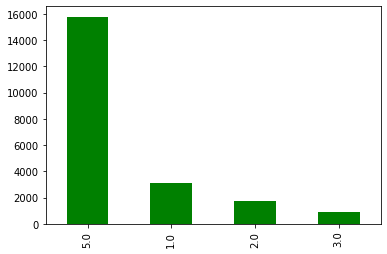

In [86]:
df['Project Status'].value_counts().plot(kind='bar', color='green')
#save plot to a file
plt.savefig('project_status.png')

In [87]:
df.head()

,Region,Project Status,Last Stage Reached Name,Project Name,Project Development Objective,Financing Type,Current Project Cost,IBRD Commitment,IDA Commitment,Total IDA and IBRD Commitment,Grant Amount,Lending Instrument,Sector 1,Sector 2,Sector 3,Theme 1,Theme 2
2,Eastern and Southern Africa,1.0,Bank Approved,Rwanda Priority Skills for Growth (PSG),The Program Development Objective is to expand...,IDA,120000000,0,120000000,120000000,0,Program-for-Results Financing,Public Administration - Education,Tertiary Education,Workforce Development and Vocational Education,Education for the knowledge economy,NaN
3,East Asia and Pacific,1.0,Bank Approved,Road Climate Resilience Project Second Additio...,The project will deliver sustainable climate r...,NaN,39140000,0,35200000,35200000,0,Investment Project Financing,Public Administration - Transportation,Rural and Inter-Urban Roads,NaN,NaN,NaN
4,Eastern and Southern Africa,2.0,Concept Review,Kenya Devolution and Service Delivery,To improve citizen and government access to co...,NaN,340000,0,0,0,340000,Investment Project Financing,NaN,NaN,NaN,"Public expenditure, financial management and p...",Decentralization
5,Western and Central Africa,3.0,NaN,Cameroon Health System Strengthening Project,To increase utilization and quality of reprodu...,NaN,100000000,0,100000000,100000000,0,Investment Project Financing,NaN,NaN,NaN,NaN,NaN
6,Western and Central Africa,3.0,NaN,Chad Agribusiness and Rural Transformation Pro...,"The project Development Objective (PDO) is ""to...",NaN,150000000,0,150000000,150000000,0,Investment Project Financing,NaN,NaN,NaN,NaN,NaN


In [88]:
#convert all NaN values to 0 
df.fillna(0, inplace=True)


In [89]:
df 

,Region,Project Status,Last Stage Reached Name,Project Name,Project Development Objective,Financing Type,Current Project Cost,IBRD Commitment,IDA Commitment,Total IDA and IBRD Commitment,Grant Amount,Lending Instrument,Sector 1,Sector 2,Sector 3,Theme 1,Theme 2
2,Eastern and Southern Africa,1.0,Bank Approved,Rwanda Priority Skills for Growth (PSG),The Program Development Objective is to expand...,IDA,120000000,0,120000000,120000000,0,Program-for-Results Financing,Public Administration - Education,Tertiary Education,Workforce Development and Vocational Education,Education for the knowledge economy,0
3,East Asia and Pacific,1.0,Bank Approved,Road Climate Resilience Project Second Additio...,The project will deliver sustainable climate r...,0,39140000,0,35200000,35200000,0,Investment Project Financing,Public Administration - Transportation,Rural and Inter-Urban Roads,0,0,0
4,Eastern and Southern Africa,2.0,Concept Review,Kenya Devolution and Service Delivery,To improve citizen and government access to co...,0,340000,0,0,0,340000,Investment Project Financing,0,0,0,"Public expenditure, financial management and p...",Decentralization
5,Western and Central Africa,3.0,0,Cameroon Health System Strengthening Project,To increase utilization and quality of reprodu...,0,100000000,0,100000000,100000000,0,Investment Project Financing,0,0,0,0,0
6,Western and Central Africa,3.0,0,Chad Agribusiness and Rural Transformation Pro...,"The project Development Objective (PDO) is ""to...",0,150000000,0,150000000,150000000,0,Investment Project Financing,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21540,Africa,2.0,0,UEMOA Regional Financial Sector Project,0,0,10000000,0,10000000,10000000,0,Specific Investment Loan,0,0,0,0,0
21541,Africa,5.0,Bank Approved,Engineering and Technical Assistance Project,0,IDA,6100000,0,5500000,5500000,0,Technical Assistance Loan,Power,0,0,Legal institutions for a market economy,Regional integration
21542,Africa,5.0,0,Regional Development Project (03),0,0,55000000,15000000,40000000,55000000,0,Financial Intermediary Loan,Banking Institutions,"Other Agriculture, Fishing and Forestry",Other Transportation,Environmental policies and institutions,Other financial and private sector development
21543,Africa,5.0,Bank Approved,REIMP(CEN.ENV.INFO),0,Other,19700000,0,0,0,4100000,Specific Investment Loan,Other Public Administration,Other Information and Communications Technologies,Social Protection,Land administration and management,Environmental policies and institutions


In [90]:
df['Last Stage Reached Name'].unique()

array(['Bank Approved', 'Concept Review', 0, 'Begin Negotiation',
       'Decision Meeting', 'Begin Appraisal'], dtype=object)

In [91]:
#covert last stage reached name to numeric
df['Last Stage Reached Name'] = df['Last Stage Reached Name'].replace(['0','Bank Approved', 'Concept Review', 'Begin Negotiation', 'Decision Meeting', 'Begin Appraisal'], [0, 1, 2, 3, 4,5])

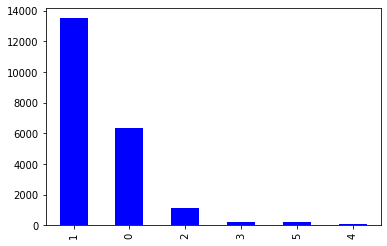

In [92]:
#plot last stage reached name
df['Last Stage Reached Name'].value_counts().plot(kind='bar', color='blue')
#save plot to a file
plt.savefig('last_stage_reached.png')

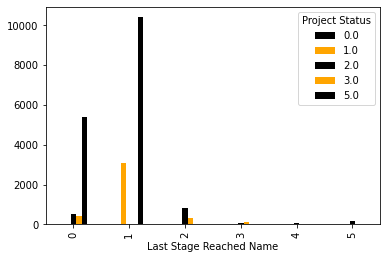

In [93]:
#plot between last stage reached name and project status
df.groupby(['Last Stage Reached Name', 'Project Status']).size().unstack().plot(kind='bar', color=['black', 'orange'])

#add label
Xlabel = df['Last Stage Reached Name']
Ylabel = df['Last Stage Reached Name']

#save plot to a file
plt.savefig('last_stage_reached_vs_project_status.png')



In [94]:
df.head()

,Region,Project Status,Last Stage Reached Name,Project Name,Project Development Objective,Financing Type,Current Project Cost,IBRD Commitment,IDA Commitment,Total IDA and IBRD Commitment,Grant Amount,Lending Instrument,Sector 1,Sector 2,Sector 3,Theme 1,Theme 2
2,Eastern and Southern Africa,1.0,1,Rwanda Priority Skills for Growth (PSG),The Program Development Objective is to expand...,IDA,120000000,0,120000000,120000000,0,Program-for-Results Financing,Public Administration - Education,Tertiary Education,Workforce Development and Vocational Education,Education for the knowledge economy,0
3,East Asia and Pacific,1.0,1,Road Climate Resilience Project Second Additio...,The project will deliver sustainable climate r...,0,39140000,0,35200000,35200000,0,Investment Project Financing,Public Administration - Transportation,Rural and Inter-Urban Roads,0,0,0
4,Eastern and Southern Africa,2.0,2,Kenya Devolution and Service Delivery,To improve citizen and government access to co...,0,340000,0,0,0,340000,Investment Project Financing,0,0,0,"Public expenditure, financial management and p...",Decentralization
5,Western and Central Africa,3.0,0,Cameroon Health System Strengthening Project,To increase utilization and quality of reprodu...,0,100000000,0,100000000,100000000,0,Investment Project Financing,0,0,0,0,0
6,Western and Central Africa,3.0,0,Chad Agribusiness and Rural Transformation Pro...,"The project Development Objective (PDO) is ""to...",0,150000000,0,150000000,150000000,0,Investment Project Financing,0,0,0,0,0


In [95]:
#print unique values of financing type
df['Financing Type'].unique()
#print counts 
df['Financing Type'].value_counts()

0         8506
Other     4835
IDA       3541
Grants    2816
IBRD      1845
Name: Financing Type, dtype: int64

In [96]:
df['Lending Instrument'] = df['Lending Instrument'].replace(['0','Specific Investment Loan', 'Investment Project Financing','Technical Assistance Loan',                
'Sector Investment and Maintenance Loan','Development Policy Lending','Financial Intermediary Loan','Emergency Recovery Loan','Structural Adjustment Loan','Adaptable Program Loan',                      
'Sector Adjustment Loan','Program-for-Results Financing','Learning and Innovation Loan','UNIDENTIFIED','Programmatic Structural Adjustment Loan', 'Poverty Reduction Support Credit',             
'Rehabilitation Loan','Debt and Debt Service Reduction Loan','Special Structural Adjustment Loan'], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18])


In [97]:
df['Lending Instrument'].unique()
df['Lending Instrument'].value_counts()
#convert lending instrument to numeric

1     8021
2     5498
3     1653
4     1299
5     1250
6      821
7      578
8      564
9      518
10     387
11     338
0      249
12     180
13      56
14      51
15      40
16      22
17      16
18       2
Name: Lending Instrument, dtype: int64

In [98]:
df 

,Region,Project Status,Last Stage Reached Name,Project Name,Project Development Objective,Financing Type,Current Project Cost,IBRD Commitment,IDA Commitment,Total IDA and IBRD Commitment,Grant Amount,Lending Instrument,Sector 1,Sector 2,Sector 3,Theme 1,Theme 2
2,Eastern and Southern Africa,1.0,1,Rwanda Priority Skills for Growth (PSG),The Program Development Objective is to expand...,IDA,120000000,0,120000000,120000000,0,11,Public Administration - Education,Tertiary Education,Workforce Development and Vocational Education,Education for the knowledge economy,0
3,East Asia and Pacific,1.0,1,Road Climate Resilience Project Second Additio...,The project will deliver sustainable climate r...,0,39140000,0,35200000,35200000,0,2,Public Administration - Transportation,Rural and Inter-Urban Roads,0,0,0
4,Eastern and Southern Africa,2.0,2,Kenya Devolution and Service Delivery,To improve citizen and government access to co...,0,340000,0,0,0,340000,2,0,0,0,"Public expenditure, financial management and p...",Decentralization
5,Western and Central Africa,3.0,0,Cameroon Health System Strengthening Project,To increase utilization and quality of reprodu...,0,100000000,0,100000000,100000000,0,2,0,0,0,0,0
6,Western and Central Africa,3.0,0,Chad Agribusiness and Rural Transformation Pro...,"The project Development Objective (PDO) is ""to...",0,150000000,0,150000000,150000000,0,2,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21540,Africa,2.0,0,UEMOA Regional Financial Sector Project,0,0,10000000,0,10000000,10000000,0,1,0,0,0,0,0
21541,Africa,5.0,1,Engineering and Technical Assistance Project,0,IDA,6100000,0,5500000,5500000,0,3,Power,0,0,Legal institutions for a market economy,Regional integration
21542,Africa,5.0,0,Regional Development Project (03),0,0,55000000,15000000,40000000,55000000,0,6,Banking Institutions,"Other Agriculture, Fishing and Forestry",Other Transportation,Environmental policies and institutions,Other financial and private sector development
21543,Africa,5.0,1,REIMP(CEN.ENV.INFO),0,Other,19700000,0,0,0,4100000,1,Other Public Administration,Other Information and Communications Technologies,Social Protection,Land administration and management,Environmental policies and institutions


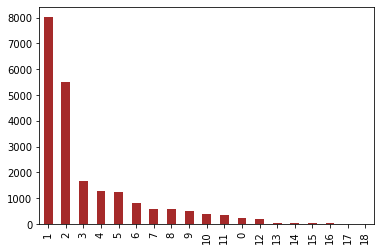

In [99]:
#plot lending instrument
df['Lending Instrument'].value_counts().plot(kind='bar', color='brown')
#add label
Xlabel = df['Lending Instrument']
Ylabel = df['Lending Instrument']
#save plot to a file
plt.savefig('lending_instrument.png')

In [100]:
#region unique 
df['Region'].unique()
#print counts
df['Region'].value_counts()

Latin America and Caribbean     3766
Eastern and Southern Africa     3447
East Asia and Pacific           3376
Western and Central Africa      3317
Europe and Central Asia         2892
South Asia                      2625
Middle East and North Africa    1758
Africa                           208
Other                            145
Africa East                        5
Africa West                        2
0                                  2
Name: Region, dtype: int64

In [101]:
#convert to numeric 
df['Region'] = df['Region'].replace(['0','Latin America and Caribbean', 'Eastern and Southern Africa', 'East Asia and Pacific','Western and Central Africa', 'Europe and Central Asia', 'South Asia', 'Middle East and North Africa', 'Africa', 'Other', 'Africa East', 'Africa West'], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10,11])

In [102]:
df

,Region,Project Status,Last Stage Reached Name,Project Name,Project Development Objective,Financing Type,Current Project Cost,IBRD Commitment,IDA Commitment,Total IDA and IBRD Commitment,Grant Amount,Lending Instrument,Sector 1,Sector 2,Sector 3,Theme 1,Theme 2
2,2,1.0,1,Rwanda Priority Skills for Growth (PSG),The Program Development Objective is to expand...,IDA,120000000,0,120000000,120000000,0,11,Public Administration - Education,Tertiary Education,Workforce Development and Vocational Education,Education for the knowledge economy,0
3,3,1.0,1,Road Climate Resilience Project Second Additio...,The project will deliver sustainable climate r...,0,39140000,0,35200000,35200000,0,2,Public Administration - Transportation,Rural and Inter-Urban Roads,0,0,0
4,2,2.0,2,Kenya Devolution and Service Delivery,To improve citizen and government access to co...,0,340000,0,0,0,340000,2,0,0,0,"Public expenditure, financial management and p...",Decentralization
5,4,3.0,0,Cameroon Health System Strengthening Project,To increase utilization and quality of reprodu...,0,100000000,0,100000000,100000000,0,2,0,0,0,0,0
6,4,3.0,0,Chad Agribusiness and Rural Transformation Pro...,"The project Development Objective (PDO) is ""to...",0,150000000,0,150000000,150000000,0,2,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21540,8,2.0,0,UEMOA Regional Financial Sector Project,0,0,10000000,0,10000000,10000000,0,1,0,0,0,0,0
21541,8,5.0,1,Engineering and Technical Assistance Project,0,IDA,6100000,0,5500000,5500000,0,3,Power,0,0,Legal institutions for a market economy,Regional integration
21542,8,5.0,0,Regional Development Project (03),0,0,55000000,15000000,40000000,55000000,0,6,Banking Institutions,"Other Agriculture, Fishing and Forestry",Other Transportation,Environmental policies and institutions,Other financial and private sector development
21543,8,5.0,1,REIMP(CEN.ENV.INFO),0,Other,19700000,0,0,0,4100000,1,Other Public Administration,Other Information and Communications Technologies,Social Protection,Land administration and management,Environmental policies and institutions


In [103]:
#financing type unique values
df['Financing Type'].unique()
#print counts
df['Financing Type'].value_counts()

0         8506
Other     4835
IDA       3541
Grants    2816
IBRD      1845
Name: Financing Type, dtype: int64

In [104]:
#replace with numeric value 
df['Financing Type'] = df['Financing Type'].replace(['0','Other', 'IDA','Grants','IBRD'] , [0, 1, 2, 3, 4]) 

In [105]:
df

,Region,Project Status,Last Stage Reached Name,Project Name,Project Development Objective,Financing Type,Current Project Cost,IBRD Commitment,IDA Commitment,Total IDA and IBRD Commitment,Grant Amount,Lending Instrument,Sector 1,Sector 2,Sector 3,Theme 1,Theme 2
2,2,1.0,1,Rwanda Priority Skills for Growth (PSG),The Program Development Objective is to expand...,2,120000000,0,120000000,120000000,0,11,Public Administration - Education,Tertiary Education,Workforce Development and Vocational Education,Education for the knowledge economy,0
3,3,1.0,1,Road Climate Resilience Project Second Additio...,The project will deliver sustainable climate r...,0,39140000,0,35200000,35200000,0,2,Public Administration - Transportation,Rural and Inter-Urban Roads,0,0,0
4,2,2.0,2,Kenya Devolution and Service Delivery,To improve citizen and government access to co...,0,340000,0,0,0,340000,2,0,0,0,"Public expenditure, financial management and p...",Decentralization
5,4,3.0,0,Cameroon Health System Strengthening Project,To increase utilization and quality of reprodu...,0,100000000,0,100000000,100000000,0,2,0,0,0,0,0
6,4,3.0,0,Chad Agribusiness and Rural Transformation Pro...,"The project Development Objective (PDO) is ""to...",0,150000000,0,150000000,150000000,0,2,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21540,8,2.0,0,UEMOA Regional Financial Sector Project,0,0,10000000,0,10000000,10000000,0,1,0,0,0,0,0
21541,8,5.0,1,Engineering and Technical Assistance Project,0,2,6100000,0,5500000,5500000,0,3,Power,0,0,Legal institutions for a market economy,Regional integration
21542,8,5.0,0,Regional Development Project (03),0,0,55000000,15000000,40000000,55000000,0,6,Banking Institutions,"Other Agriculture, Fishing and Forestry",Other Transportation,Environmental policies and institutions,Other financial and private sector development
21543,8,5.0,1,REIMP(CEN.ENV.INFO),0,1,19700000,0,0,0,4100000,1,Other Public Administration,Other Information and Communications Technologies,Social Protection,Land administration and management,Environmental policies and institutions


Convert the columns to numeric score by nltk tokenizer

In [106]:
import string 
string.punctuation

#replace 0 in project name with null 
df['Project Name'] = df['Project Name'].replace(0, np.nan)
# df['Project Development Objective'] = df['Project Development Objective'].replace(0, np.nan)
df['Sector 1'] = df['Sector 1'].replace(0, np.nan)
df['Sector 2'] = df['Sector 2'].replace(0, np.nan)
df['Sector 3'] = df['Sector 3'].replace(0, np.nan)
df['Theme 1'] = df['Theme 1'].replace(0, np.nan)
df['Theme 2'] = df['Theme 2'].replace(0, np.nan)

In [107]:
df

,Region,Project Status,Last Stage Reached Name,Project Name,Project Development Objective,Financing Type,Current Project Cost,IBRD Commitment,IDA Commitment,Total IDA and IBRD Commitment,Grant Amount,Lending Instrument,Sector 1,Sector 2,Sector 3,Theme 1,Theme 2
2,2,1.0,1,Rwanda Priority Skills for Growth (PSG),The Program Development Objective is to expand...,2,120000000,0,120000000,120000000,0,11,Public Administration - Education,Tertiary Education,Workforce Development and Vocational Education,Education for the knowledge economy,NaN
3,3,1.0,1,Road Climate Resilience Project Second Additio...,The project will deliver sustainable climate r...,0,39140000,0,35200000,35200000,0,2,Public Administration - Transportation,Rural and Inter-Urban Roads,NaN,NaN,NaN
4,2,2.0,2,Kenya Devolution and Service Delivery,To improve citizen and government access to co...,0,340000,0,0,0,340000,2,NaN,NaN,NaN,"Public expenditure, financial management and p...",Decentralization
5,4,3.0,0,Cameroon Health System Strengthening Project,To increase utilization and quality of reprodu...,0,100000000,0,100000000,100000000,0,2,NaN,NaN,NaN,NaN,NaN
6,4,3.0,0,Chad Agribusiness and Rural Transformation Pro...,"The project Development Objective (PDO) is ""to...",0,150000000,0,150000000,150000000,0,2,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21540,8,2.0,0,UEMOA Regional Financial Sector Project,0,0,10000000,0,10000000,10000000,0,1,NaN,NaN,NaN,NaN,NaN
21541,8,5.0,1,Engineering and Technical Assistance Project,0,2,6100000,0,5500000,5500000,0,3,Power,NaN,NaN,Legal institutions for a market economy,Regional integration
21542,8,5.0,0,Regional Development Project (03),0,0,55000000,15000000,40000000,55000000,0,6,Banking Institutions,"Other Agriculture, Fishing and Forestry",Other Transportation,Environmental policies and institutions,Other financial and private sector development
21543,8,5.0,1,REIMP(CEN.ENV.INFO),0,1,19700000,0,0,0,4100000,1,Other Public Administration,Other Information and Communications Technologies,Social Protection,Land administration and management,Environmental policies and institutions


In [108]:
#convert float to string 
df['Project Name'] = df['Project Name'].astype(str)
# df['Project Development Objective'] = df['Project Development Objective'].astype(str)
df['Sector 1'] = df['Sector 1'].astype(str)
df['Sector 2'] = df['Sector 2'].astype(str)
df['Sector 3'] = df['Sector 3'].astype(str)
df['Theme 1'] = df['Theme 1'].astype(str)
df['Theme 2'] = df['Theme 2'].astype(str)



In [109]:
def remove_punctuation(text):
    text_nopunct = "".join([char for char in text if char not in string.punctuation])
    return text_nopunct

df['Project Name'] = df['Project Name'].apply(remove_punctuation)
# df['Project Development Objective'] = df['Project Development Objective'].apply(remove_punctuation)
df['Sector 1'] = df['Sector 1'].apply(remove_punctuation)
df['Sector 2'] = df['Sector 2'].apply(remove_punctuation)
df['Sector 3'] = df['Sector 3'].apply(remove_punctuation)
df['Theme 1'] = df['Theme 1'].apply(remove_punctuation)
df['Theme 2'] = df['Theme 2'].apply(remove_punctuation)

In [110]:
df

,Region,Project Status,Last Stage Reached Name,Project Name,Project Development Objective,Financing Type,Current Project Cost,IBRD Commitment,IDA Commitment,Total IDA and IBRD Commitment,Grant Amount,Lending Instrument,Sector 1,Sector 2,Sector 3,Theme 1,Theme 2
2,2,1.0,1,Rwanda Priority Skills for Growth PSG,The Program Development Objective is to expand...,2,120000000,0,120000000,120000000,0,11,Public Administration Education,Tertiary Education,Workforce Development and Vocational Education,Education for the knowledge economy,nan
3,3,1.0,1,Road Climate Resilience Project Second Additio...,The project will deliver sustainable climate r...,0,39140000,0,35200000,35200000,0,2,Public Administration Transportation,Rural and InterUrban Roads,nan,nan,nan
4,2,2.0,2,Kenya Devolution and Service Delivery,To improve citizen and government access to co...,0,340000,0,0,0,340000,2,nan,nan,nan,Public expenditure financial management and pr...,Decentralization
5,4,3.0,0,Cameroon Health System Strengthening Project,To increase utilization and quality of reprodu...,0,100000000,0,100000000,100000000,0,2,nan,nan,nan,nan,nan
6,4,3.0,0,Chad Agribusiness and Rural Transformation Pro...,"The project Development Objective (PDO) is ""to...",0,150000000,0,150000000,150000000,0,2,nan,nan,nan,nan,nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21540,8,2.0,0,UEMOA Regional Financial Sector Project,0,0,10000000,0,10000000,10000000,0,1,nan,nan,nan,nan,nan
21541,8,5.0,1,Engineering and Technical Assistance Project,0,2,6100000,0,5500000,5500000,0,3,Power,nan,nan,Legal institutions for a market economy,Regional integration
21542,8,5.0,0,Regional Development Project 03,0,0,55000000,15000000,40000000,55000000,0,6,Banking Institutions,Other Agriculture Fishing and Forestry,Other Transportation,Environmental policies and institutions,Other financial and private sector development
21543,8,5.0,1,REIMPCENENVINFO,0,1,19700000,0,0,0,4100000,1,Other Public Administration,Other Information and Communications Technologies,Social Protection,Land administration and management,Environmental policies and institutions


In [111]:
import re 
def tokenization(text):
    text_token = re.sub('[^a-zA-Z]', ' ', text)
    text_token = text_token.lower()
    text_token = text_token.split()
    return text_token

df['Project Name'] = df['Project Name'].apply(tokenization)
# df['Project Development Objective'] = df['Project Development Objective'].apply(tokenization)
df['Sector 1'] = df['Sector 1'].apply(tokenization)
df['Sector 2'] = df['Sector 2'].apply(tokenization)
df['Sector 3'] = df['Sector 3'].apply(tokenization)
df['Theme 1'] = df['Theme 1'].apply(tokenization)
df['Theme 2'] = df['Theme 2'].apply(tokenization)


In [112]:
df 

,Region,Project Status,Last Stage Reached Name,Project Name,Project Development Objective,Financing Type,Current Project Cost,IBRD Commitment,IDA Commitment,Total IDA and IBRD Commitment,Grant Amount,Lending Instrument,Sector 1,Sector 2,Sector 3,Theme 1,Theme 2
2,2,1.0,1,"[rwanda, priority, skills, for, growth, psg]",The Program Development Objective is to expand...,2,120000000,0,120000000,120000000,0,11,"[public, administration, education]","[tertiary, education]","[workforce, development, and, vocational, educ...","[education, for, the, knowledge, economy]",[nan]
3,3,1.0,1,"[road, climate, resilience, project, second, a...",The project will deliver sustainable climate r...,0,39140000,0,35200000,35200000,0,2,"[public, administration, transportation]","[rural, and, interurban, roads]",[nan],[nan],[nan]
4,2,2.0,2,"[kenya, devolution, and, service, delivery]",To improve citizen and government access to co...,0,340000,0,0,0,340000,2,[nan],[nan],[nan],"[public, expenditure, financial, management, a...",[decentralization]
5,4,3.0,0,"[cameroon, health, system, strengthening, proj...",To increase utilization and quality of reprodu...,0,100000000,0,100000000,100000000,0,2,[nan],[nan],[nan],[nan],[nan]
6,4,3.0,0,"[chad, agribusiness, and, rural, transformatio...","The project Development Objective (PDO) is ""to...",0,150000000,0,150000000,150000000,0,2,[nan],[nan],[nan],[nan],[nan]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21540,8,2.0,0,"[uemoa, regional, financial, sector, project]",0,0,10000000,0,10000000,10000000,0,1,[nan],[nan],[nan],[nan],[nan]
21541,8,5.0,1,"[engineering, and, technical, assistance, proj...",0,2,6100000,0,5500000,5500000,0,3,[power],[nan],[nan],"[legal, institutions, for, a, market, economy]","[regional, integration]"
21542,8,5.0,0,"[regional, development, project]",0,0,55000000,15000000,40000000,55000000,0,6,"[banking, institutions]","[other, agriculture, fishing, and, forestry]","[other, transportation]","[environmental, policies, and, institutions]","[other, financial, and, private, sector, devel..."
21543,8,5.0,1,[reimpcenenvinfo],0,1,19700000,0,0,0,4100000,1,"[other, public, administration]","[other, information, and, communications, tech...","[social, protection]","[land, administration, and, management]","[environmental, policies, and, institutions]"


In [113]:
#drop columns number 4
df.drop(df.columns[4], axis=1, inplace=True)


In [114]:
df.head()

,Region,Project Status,Last Stage Reached Name,Project Name,Financing Type,Current Project Cost,IBRD Commitment,IDA Commitment,Total IDA and IBRD Commitment,Grant Amount,Lending Instrument,Sector 1,Sector 2,Sector 3,Theme 1,Theme 2
2,2,1.0,1,"[rwanda, priority, skills, for, growth, psg]",2,120000000,0,120000000,120000000,0,11,"[public, administration, education]","[tertiary, education]","[workforce, development, and, vocational, educ...","[education, for, the, knowledge, economy]",[nan]
3,3,1.0,1,"[road, climate, resilience, project, second, a...",0,39140000,0,35200000,35200000,0,2,"[public, administration, transportation]","[rural, and, interurban, roads]",[nan],[nan],[nan]
4,2,2.0,2,"[kenya, devolution, and, service, delivery]",0,340000,0,0,0,340000,2,[nan],[nan],[nan],"[public, expenditure, financial, management, a...",[decentralization]
5,4,3.0,0,"[cameroon, health, system, strengthening, proj...",0,100000000,0,100000000,100000000,0,2,[nan],[nan],[nan],[nan],[nan]
6,4,3.0,0,"[chad, agribusiness, and, rural, transformatio...",0,150000000,0,150000000,150000000,0,2,[nan],[nan],[nan],[nan],[nan]


In [115]:
#convert list to string 
df['Project Name'] = df['Project Name'].apply(lambda x: ' '.join(x))
# df['Project Development Objective'] = df['Project Development Objective'].apply(lambda x: ' '.join(x))
df['Sector 1'] = df['Sector 1'].apply(lambda x: ' '.join(x))
df['Sector 2'] = df['Sector 2'].apply(lambda x: ' '.join(x))
df['Sector 3'] = df['Sector 3'].apply(lambda x: ' '.join(x))
df['Theme 1'] = df['Theme 1'].apply(lambda x: ' '.join(x))
df['Theme 2'] = df['Theme 2'].apply(lambda x: ' '.join(x))


In [116]:

def preprocess(text):
    text = text.lower() 
    text=text.strip()  
    text=re.compile('<.*?>').sub('', text) 
    text = re.compile('[%s]' % re.escape(string.punctuation)).sub(' ', text)  
    text = re.sub('\s+', ' ', text)  
    text = re.sub(r'\[[0-9]*\]',' ',text) 
    text=re.sub(r'[^\w\s]', '', str(text).lower().strip())
    text = re.sub(r'\d',' ',text) 
    text = re.sub(r'\s+',' ',text) 
    return text

df['Project Name'] = df['Project Name'].apply(preprocess)
df['Sector 1'] = df['Sector 1'].apply(preprocess)
df['Sector 2'] = df['Sector 2'].apply(preprocess)
df['Sector 3'] = df['Sector 3'].apply(preprocess)
df['Theme 1'] = df['Theme 1'].apply(preprocess)
df['Theme 2'] = df['Theme 2'].apply(preprocess)

In [117]:
df

,Region,Project Status,Last Stage Reached Name,Project Name,Financing Type,Current Project Cost,IBRD Commitment,IDA Commitment,Total IDA and IBRD Commitment,Grant Amount,Lending Instrument,Sector 1,Sector 2,Sector 3,Theme 1,Theme 2
2,2,1.0,1,rwanda priority skills for growth psg,2,120000000,0,120000000,120000000,0,11,public administration education,tertiary education,workforce development and vocational education,education for the knowledge economy,nan
3,3,1.0,1,road climate resilience project second additio...,0,39140000,0,35200000,35200000,0,2,public administration transportation,rural and interurban roads,nan,nan,nan
4,2,2.0,2,kenya devolution and service delivery,0,340000,0,0,0,340000,2,nan,nan,nan,public expenditure financial management and pr...,decentralization
5,4,3.0,0,cameroon health system strengthening project,0,100000000,0,100000000,100000000,0,2,nan,nan,nan,nan,nan
6,4,3.0,0,chad agribusiness and rural transformation pro...,0,150000000,0,150000000,150000000,0,2,nan,nan,nan,nan,nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21540,8,2.0,0,uemoa regional financial sector project,0,10000000,0,10000000,10000000,0,1,nan,nan,nan,nan,nan
21541,8,5.0,1,engineering and technical assistance project,2,6100000,0,5500000,5500000,0,3,power,nan,nan,legal institutions for a market economy,regional integration
21542,8,5.0,0,regional development project,0,55000000,15000000,40000000,55000000,0,6,banking institutions,other agriculture fishing and forestry,other transportation,environmental policies and institutions,other financial and private sector development
21543,8,5.0,1,reimpcenenvinfo,1,19700000,0,0,0,4100000,1,other public administration,other information and communications technologies,social protection,land administration and management,environmental policies and institutions


In [118]:
#drop rows of 'Active' 'Pipeline', 'nan'

# for i in range(len(df['Project Status'])):
#     if df['Project Status'][i] == 1.0 or df['Project Status'][i] == 3.0 or df['Project Status'][i] == 4.0:
#         df.drop(df.index[i], inplace=True, axis = 0)
df.drop(df[df['Project Status'] == 1.0].index, inplace=True)
df.drop(df[df['Project Status'] == 3.0].index, inplace=True)
df.drop(df[df['Project Status'] == 4.0].index, inplace=True)

In [119]:
df

,Region,Project Status,Last Stage Reached Name,Project Name,Financing Type,Current Project Cost,IBRD Commitment,IDA Commitment,Total IDA and IBRD Commitment,Grant Amount,Lending Instrument,Sector 1,Sector 2,Sector 3,Theme 1,Theme 2
4,2,2.0,2,kenya devolution and service delivery,0,340000,0,0,0,340000,2,nan,nan,nan,public expenditure financial management and pr...,decentralization
196,6,2.0,2,strengthening teachinglearning and results for...,0,1000000000,1000000000,0,1000000000,0,11,nan,nan,nan,nan,nan
260,5,2.0,2,emergency response and preparedness programfor...,0,1448650000,288650000,0,288650000,0,11,nan,nan,nan,nan,nan
475,5,2.0,2,sustainable energy efficiency in municipal ser...,0,341640000,300000000,0,300000000,0,2,nan,nan,nan,nan,nan
516,0,0.0,0,nan,0,0,0,0,0,0,0,nan,nan,nan,nan,nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21540,8,2.0,0,uemoa regional financial sector project,0,10000000,0,10000000,10000000,0,1,nan,nan,nan,nan,nan
21541,8,5.0,1,engineering and technical assistance project,2,6100000,0,5500000,5500000,0,3,power,nan,nan,legal institutions for a market economy,regional integration
21542,8,5.0,0,regional development project,0,55000000,15000000,40000000,55000000,0,6,banking institutions,other agriculture fishing and forestry,other transportation,environmental policies and institutions,other financial and private sector development
21543,8,5.0,1,reimpcenenvinfo,1,19700000,0,0,0,4100000,1,other public administration,other information and communications technologies,social protection,land administration and management,environmental policies and institutions


In [120]:

len(df)

17512

In [121]:
df.reset_index(drop=True, inplace=True)

In [122]:
df

,Region,Project Status,Last Stage Reached Name,Project Name,Financing Type,Current Project Cost,IBRD Commitment,IDA Commitment,Total IDA and IBRD Commitment,Grant Amount,Lending Instrument,Sector 1,Sector 2,Sector 3,Theme 1,Theme 2
0,2,2.0,2,kenya devolution and service delivery,0,340000,0,0,0,340000,2,nan,nan,nan,public expenditure financial management and pr...,decentralization
1,6,2.0,2,strengthening teachinglearning and results for...,0,1000000000,1000000000,0,1000000000,0,11,nan,nan,nan,nan,nan
2,5,2.0,2,emergency response and preparedness programfor...,0,1448650000,288650000,0,288650000,0,11,nan,nan,nan,nan,nan
3,5,2.0,2,sustainable energy efficiency in municipal ser...,0,341640000,300000000,0,300000000,0,2,nan,nan,nan,nan,nan
4,0,0.0,0,nan,0,0,0,0,0,0,0,nan,nan,nan,nan,nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17507,8,2.0,0,uemoa regional financial sector project,0,10000000,0,10000000,10000000,0,1,nan,nan,nan,nan,nan
17508,8,5.0,1,engineering and technical assistance project,2,6100000,0,5500000,5500000,0,3,power,nan,nan,legal institutions for a market economy,regional integration
17509,8,5.0,0,regional development project,0,55000000,15000000,40000000,55000000,0,6,banking institutions,other agriculture fishing and forestry,other transportation,environmental policies and institutions,other financial and private sector development
17510,8,5.0,1,reimpcenenvinfo,1,19700000,0,0,0,4100000,1,other public administration,other information and communications technologies,social protection,land administration and management,environmental policies and institutions


In [123]:
#shape of column
df.shape

(17512, 16)

In [124]:
#replace 2(Dropped) with 0 and 5(Closed) with 1 in Project Status
df['Project Status'] = df['Project Status'].replace(2, 0)
df['Project Status'] = df['Project Status'].replace(5, 1)

In [125]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer


tfidf_vectorizer = TfidfVectorizer(use_idf=True)
a = tfidf_vectorizer.fit_transform(df['Project Name'])
b = tfidf_vectorizer.fit_transform(df['Sector 1'])
c = tfidf_vectorizer.fit_transform(df['Sector 2'])
d = tfidf_vectorizer.fit_transform(df['Sector 3'])
e = tfidf_vectorizer.fit_transform(df['Theme 1'])
f = tfidf_vectorizer.fit_transform(df['Theme 2'])
print(a.shape)
print(b.shape)
print(c.shape)
print(d.shape)
print(e.shape)
print(f.shape)
vocabulary = tfidf_vectorizer.vocabulary_
print(vocabulary)


(17512, 7085)
(17512, 189)
(17512, 129)
(17512, 124)
(17512, 149)
(17512, 148)
{'decentralization': 24, 'nan': 83, 'regulation': 113, 'and': 7, 'competition': 18, 'policy': 97, 'public': 109, 'expenditure': 38, 'financial': 42, 'management': 74, 'procurement': 106, 'export': 39, 'development': 25, 'competitiveness': 19, 'debt': 23, 'fiscal': 43, 'sustainability': 137, 'poverty': 102, 'strategy': 134, 'analysis': 6, 'monitoring': 81, 'other': 91, 'economic': 31, 'judicial': 65, 'dispute': 30, 'resolution': 115, 'mechanisms': 77, 'micro': 79, 'small': 129, 'medium': 78, 'enterprise': 35, 'support': 135, 'rural': 123, 'services': 128, 'infrastructure': 59, 'environmental': 37, 'policies': 96, 'institutions': 62, 'municipal': 82, 'governance': 50, 'institution': 61, 'building': 10, 'gender': 47, 'climate': 16, 'change': 12, 'of': 89, 'growth': 51, 'for': 45, 'private': 104, 'sector': 125, 'administrative': 3, 'civil': 15, 'service': 127, 'reform': 111, 'education': 33, 'the': 142, 'knowled

Convert a, b, c,d ,e ,f to 1D array of size 17512

In [126]:
#Convert to 1D array 
import numpy as np
a.shape
# print(a)
#print data type
print(type(a))

<class 'scipy.sparse._csr.csr_matrix'>


In [127]:
proj = a.toarray()
print(proj)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [128]:
#convert to proj 1D array
proj = proj.flatten()
proj
#unique values in proj
np.unique(proj)
#reduce size to 17512
proj = proj[:17512]


In [129]:
#add proj to df 
df['proj'] = proj

In [130]:
#unique values in proj
np.unique(df['proj'])

array([0.        , 0.14182687, 0.15503962, 0.18207331, 0.19137621,
       0.19684269, 0.20324951, 0.24211899, 0.2581488 , 0.26280125,
       0.27868962, 0.2959412 , 0.33648693, 0.34445652, 0.35501596,
       0.36989864, 0.4123857 , 0.43584133, 0.44973742, 0.63605497])

In [131]:
sec1 = b.toarray()
sec1 = sec1.flatten()
sec1 = sec1[:17512]
df['sec1'] = sec1

sec2 = c.toarray()
sec2 = sec2.flatten()
sec2 = sec2[:17512]
df['sec2'] = sec2

sec3 = d.toarray()
sec3 = sec3.flatten()
sec3 = sec3[:17512]
df['sec3'] = sec3

theme_1 = e.toarray()
theme_1 = theme_1.flatten()
theme_1 = theme_1[:17512]
df['theme_1'] = theme_1

theme_2 = f.toarray()
theme_2 = theme_2.flatten()
theme_2 = theme_2[:17512]
df['theme_2'] = theme_2


In [132]:
final_data = df[['Region','Last Stage Reached Name','Financing Type','Current Project Cost','IDA Commitment','Total IDA and IBRD Commitment','Grant Amount',	'Lending Instrument', 'proj', 'sec1', 'sec2', 'sec3', 'theme_1', 'theme_2', 'Project Status']]

In [133]:
final_data.head()


,Region,Last Stage Reached Name,Financing Type,Current Project Cost,IDA Commitment,Total IDA and IBRD Commitment,Grant Amount,Lending Instrument,proj,sec1,sec2,sec3,theme_1,theme_2,Project Status
0,2,2,0,340000,0,0,340000,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,6,2,0,1000000000,0,1000000000,0,11,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5,2,0,1448650000,0,288650000,0,11,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,5,2,0,341640000,0,300000000,0,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [134]:
from sklearn.model_selection import train_test_split
X = final_data.drop(['Project Status'], axis=1)
y = final_data['Project Status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [135]:
#training the model for binary classifier 
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
#prediction
y_pred = logreg.predict(X_test)
#confusion matrix

confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
#classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))
#accuracy score
print("Accuracy Score:")
print(accuracy_score(y_test, y_pred))

[[   3  343]
 [  21 3136]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.12      0.01      0.02       346
         1.0       0.90      0.99      0.95      3157

    accuracy                           0.90      3503
   macro avg       0.51      0.50      0.48      3503
weighted avg       0.82      0.90      0.85      3503

Accuracy Score:
0.8960890665144162


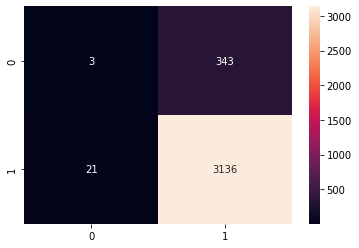

In [136]:
#plot graph for binary classifier
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(confusion_matrix, annot=True, fmt='d')
plt.show()



In [137]:
#SVM
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
# confusion_matrix = confusion_matrix(y_test, y_pred)
# print(confusion_matrix)
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy Score:")
print(accuracy_score(y_test, y_pred))



Classification Report:
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       346
         1.0       0.90      1.00      0.95      3157

    accuracy                           0.90      3503
   macro avg       0.45      0.50      0.47      3503
weighted avg       0.81      0.90      0.85      3503

Accuracy Score:
0.9012275192691979


c:\Users\Anjali\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Anjali\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Anjali\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

In [138]:
#naive bayes 
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy Score:")
print(accuracy_score(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

         0.0       0.12      0.01      0.02       346
         1.0       0.90      0.99      0.94      3157

    accuracy                           0.90      3503
   macro avg       0.51      0.50      0.48      3503
weighted avg       0.82      0.90      0.85      3503

Accuracy Score:
0.8958035969169283


In [139]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy Score:")
print(accuracy_score(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

         0.0       0.62      0.20      0.30       346
         1.0       0.92      0.99      0.95      3157

    accuracy                           0.91      3503
   macro avg       0.77      0.59      0.62      3503
weighted avg       0.89      0.91      0.89      3503

Accuracy Score:
0.9086497288038824


In [140]:
#decision tree
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy Score:")
print(accuracy_score(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

         0.0       0.79      0.79      0.79       346
         1.0       0.98      0.98      0.98      3157

    accuracy                           0.96      3503
   macro avg       0.88      0.88      0.88      3503
weighted avg       0.96      0.96      0.96      3503

Accuracy Score:
0.9583214387667713


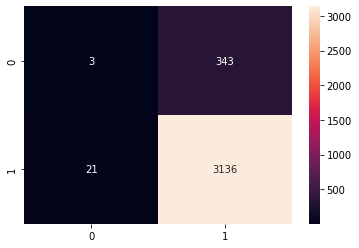

In [141]:
#make plot 
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(confusion_matrix, annot=True, fmt='d')
plt.show()


Decision Tree Classifier shows the best accuracy score of 95.83% before tuning

ENSEMBLE MODEL

HYPERMATER TUNING 

In [143]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
model = DecisionTreeClassifier()
parameters = {'max_depth':[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20], 'min_samples_split':[2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]}
grid_search = GridSearchCV(estimator=model, param_grid=parameters, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best score:", best_accuracy) 


Fitting 5 folds for each of 380 candidates, totalling 1900 fits
Best score: 0.9690914914908794


In [147]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report
model = DecisionTreeClassifier()
param_vals = {'max_depth':[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20], 'min_samples_split':[2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]}
rnd_search = RandomizedSearchCV(estimator=model, param_distributions=param_vals, n_iter=10, cv=5, verbose=1, random_state=42, n_jobs=-1)
rnd_search.fit(X_train, y_train)
best_accuracy = rnd_search.best_score_
best_parameters = rnd_search.best_params_
print("Best score:", best_accuracy)

Fitting 5 folds for each of 10 candidates, totalling 50 fitsERROR! Session/line number was not unique in
 database. History logging moved to new session 37
Best score: 0.9683776646507148
